 #                          CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder



C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\data\fraudTrain.csv')

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [ ]:
#                                        EDA

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
data.isnull()
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
data.drop(columns = "Unnamed: 0",inplace = True)
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
data['is_fraud'].value_counts()

0    1042569
1       6006
Name: is_fraud, dtype: int64

([<matplotlib.patches.Wedge at 0x254850ca400>,
 [Text(1.099821917028858, 0.019792696202597555, 'fraud'),
  Text(-1.0998219166813965, -0.01979271550998961, 'not fraud')],
 [Text(0.5999028638339224, 0.010796016110507756, '0.6%'),
  Text(-0.599902863644398, -0.010796026641812511, '99.4%')])

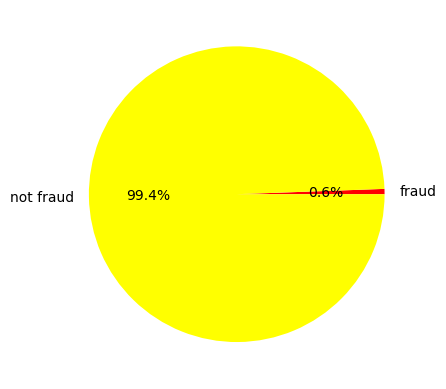

In [9]:
labels=['fraud','not fraud']
sizes=[6006,1042569]
colors=['red','yellow']
plt.pie(sizes,labels=labels,autopct = "%1.1f%%",colors=colors)

In [10]:
data.head(4)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0


In [11]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

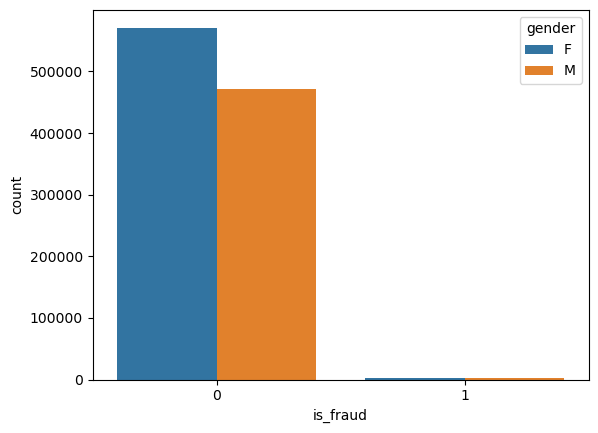

In [12]:
sns.countplot(x='is_fraud',hue='gender',data=data)

In [13]:
len(data['category'].unique())

14

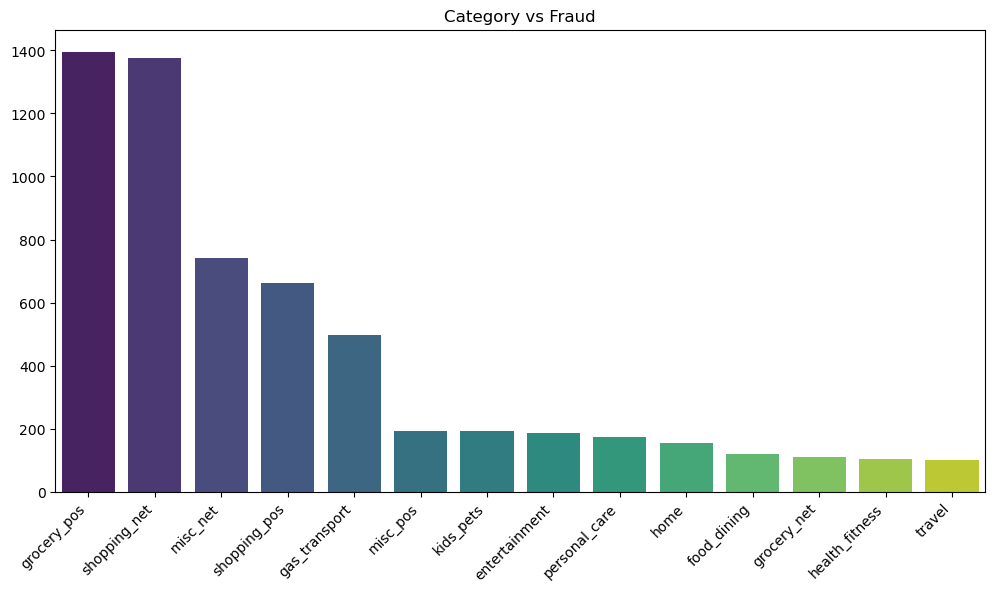

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,6))
fraud_category = data[data["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Category vs Fraud")
plt.show()

AttributeError: module 'seaborn' has no attribute 'show'

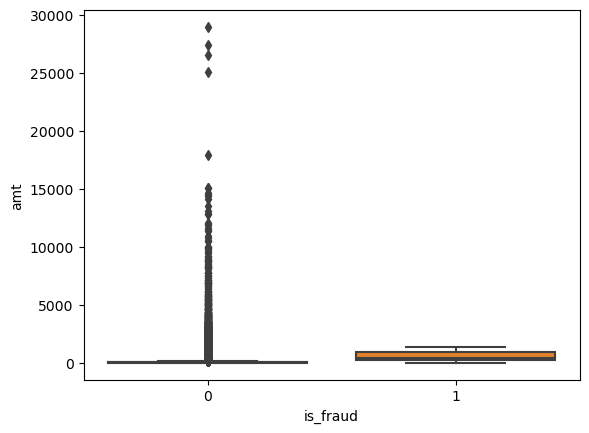

In [15]:

sns.boxplot(x="is_fraud",y="amt",data=data)
sns.show()

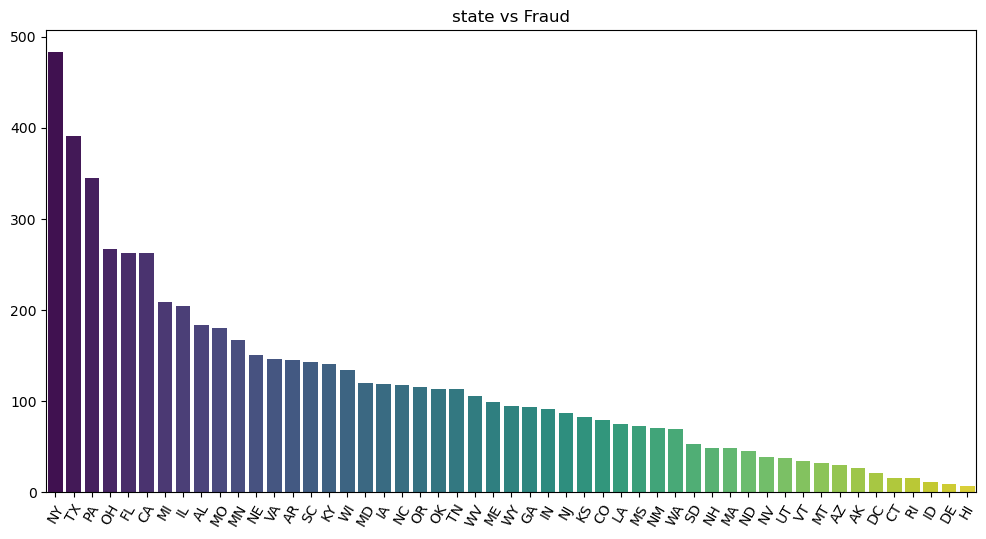

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,6))
fraud_category = data[data["is_fraud"] == 1]["state"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.xticks(rotation = 60)
plt.title("state vs Fraud")
plt.show()

In [17]:
len(data['city'].unique())

879

In [18]:
len(data['job'].unique())

493

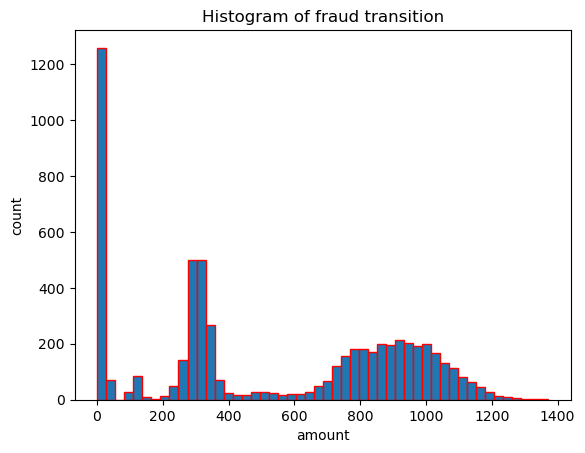

In [19]:
a=data[data["is_fraud"] == 1]['amt']
plt.hist(a,bins=50,edgecolor='red')
plt.title('Histogram of fraud transition')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()


In [20]:
!pip install imbalanced-learn

     ---------------------------------------- 14.9/14.9 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [22]:
encoder=LabelEncoder()
data['merchant']=encoder.fit_transform(data['merchant'])
data['category']=encoder.fit_transform(data['category'])
data['street']=encoder.fit_transform(data['street'])
data['job']=encoder.fit_transform(data['job'])
data['trans_num']=encoder.fit_transform(data['trans_num'])
data['first']=encoder.fit_transform(data['first'])
data['city']=encoder.fit_transform(data['city'])
data['state']=encoder.fit_transform(data['state'])
data['last']=encoder.fit_transform(data['last'])
data['gender']=encoder.fit_transform(data['gender'])
data['trans_date_trans_time']=encoder.fit_transform(data['trans_date_trans_time'])
data['dob']=encoder.fit_transform(data['dob'])



In [23]:
data.shape

(1048575, 22)

In [24]:
testdata=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\data\fraudTest.csv')
testdata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [25]:
testdata.drop(columns = "Unnamed: 0",inplace = True)


In [26]:
testdata.isnull()
testdata.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [27]:
encoder=LabelEncoder()
testdata['merchant']=encoder.fit_transform(testdata['merchant'])
testdata['category']=encoder.fit_transform(testdata['category'])
testdata['street']=encoder.fit_transform(testdata['street'])
testdata['job']=encoder.fit_transform(testdata['job'])
testdata['trans_num']=encoder.fit_transform(testdata['trans_num'])
testdata['first']=encoder.fit_transform(testdata['first'])
testdata['city']=encoder.fit_transform(testdata['city'])
testdata['state']=encoder.fit_transform(testdata['state'])
testdata['last']=encoder.fit_transform(testdata['last'])
testdata['gender']=encoder.fit_transform(testdata['gender'])
testdata['trans_date_trans_time']=encoder.fit_transform(testdata['trans_date_trans_time'])
testdata['dob']=encoder.fit_transform(testdata['dob'])

In [28]:
X=data.drop('is_fraud',axis=1)
Y=data['is_fraud']
X_test=testdata.drop('is_fraud',axis=1)
Y_test=testdata['is_fraud']

import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
state=np.random.RandomState(42)

In [ ]:
#from imblearn.combine import SMOTETomek
#smk=SMOTETomek(random_state=42)
#x_res.y_res=smk.fit_resample(X,Y)

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#os=RandomOverSampler(rati0=1)

In [ ]:
#X_train_res,Y_train_res=os.fit_sample(X,Y)

In [12]:
#X_train_res.shape,Y_train_res.shape

In [29]:
#model building
modelLR=LogisticRegression()
modelRF=RandomForestClassifier(n_estimators=100, n_jobs=-1)
modelDT=DecisionTreeClassifier()

In [ ]:
modelLR.fit(X, Y)  # Fit the Logistic Regression model
modelRF.fit(X, Y)  # Fit the Random Forest model
modelDT.fit(X, Y)  # Fit the Decision Tree model

#  predictions on the test set
predictionsLR = modelLR.predict(X_test)
predictionsRF = modelRF.predict(X_test)
predictionsDT = modelDT.predict(X_test)


In [35]:
# get models accuracy 

accuracyLR=accuracy_score(Y_test,predictionsLR)
accuracyRF=accuracy_score(Y_test,predictionsRF)
accuracyDT=accuracy_score(Y_test,predictionsDT)


In [36]:
accuracyLR ,accuracyRF,  accuracyDT

(0.9963148725764284, 0.9971969509490918, 0.9953543872373061)

In [37]:
#create confusion matrix

cmLR=confusion_matrix(Y_test,predictionsLR)
cmRF=confusion_matrix(Y_test,predictionsRF)
cmDT=confusion_matrix(Y_test,predictionsRF)

<AxesSubplot:>

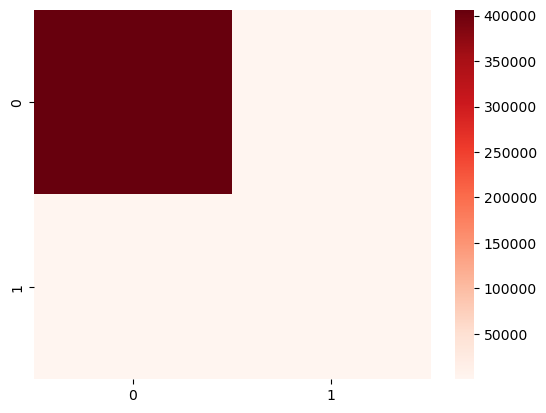

In [39]:
sns.heatmap(data=cmRF,cmap='Reds')